# opencv操作

In [ ]:
import cv2#opencv包,默認讀取BGR
import matplotlib.pyplot as plt#便於展示的工具,顯示圖標
import numpy as np
%matplotlib inline

img = cv2.imread('img1.jpg')#get imagine
#img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)灰度圖


In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)#0為不自動消失,按任意鍵消失,單位毫秒
cv2.destroyAllWindows()

In [ ]:
img.shape

In [ ]:
cv2.imwrite("my02.jpg",img)

In [ ]:
img.size#像素點個數

#### 視頻讀取

In [ ]:
vc= cv2.VideoCapture('vedio1.mp4')
if vc.isOpened():
    open.frame =vc.read()
else:
    open=False

In [ ]:
while open:
    ret,frame =vc.read()
    if frame is None:
        break
    if ret == True:
        gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF ==27: # 与 0xFF 进行按位与操作是为了只保留低 8 位，确保在不同系统上都能正确识别按键
            break
vc.release()
cv2.destroyAllWindows()

#### 截取圖像

In [ ]:
cat = img[0:200,0:200]
img.shape

In [ ]:
cv2.imshow("1234",cat)
cv2.waitKey(2000)
cv2.destroyAllWindows()

#### 顏色通道提取組合

In [ ]:
b,g,r = cv2.split(img)#分離BGR

In [ ]:
b

In [ ]:
img = cv2.merge((b,g,r))#還原圖像

In [ ]:
red_img = img.copy()

In [ ]:
red_img[:,:,0]=0
red_img[:,:,1]=0
cv2.imshow("red_img",red_img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

#### 邊界填充

In [ ]:
#
def show(img_):
    cv2.imshow("img_",img_)
    if cv2.waitKey(0) & 0xFF ==27: # 与 0xFF 进行按位与操作是为了只保留低 8 位，确保在不同系统上都能正确识别按键
        pass
    cv2.destroyAllWindows()


In [ ]:

img = cv2.imread("img1.jpg")
# 定义填充大小
top, bottom, left, right = 30, 30, 30, 30

# 常數填充
constant_padded = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
show(constant_padded)
# 镜像填充
reflect_padded = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT)
show(reflect_padded)
# 重复填充
replicate_padded = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)
show(replicate_padded)
# 环绕填充
wrap_padded = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_WRAP)
show(wrap_padded)


In [ ]:
img2 = img +1
cv2.add(img,img2)
cv2.imshow("img2",img2)
cv2.waitKey(2000)
cv2.destroyAllWindows()

#### 圖像融合

In [ ]:
img_resize = cv2.resize(img,(400,400))
#img_resize = cv2.resize(img,(0,0),f=1,f=3)倍數
img_resize.size
res = cv2.addWeighted(img,0.5,img2,0.5,0)#設置權重
plt.imshow(img)

#### 腐蝕

In [ ]:
img_f=cv2.imread("img_f.png")
kernelForErode = np.ones((3,3),np.uint8)
erosion =cv2.erode(img_f,kernelForErode,iterations =2)#迭代次數

cv2.imshow("erosion",erosion)
cv2.waitKey(5000)
cv2.destroyAllWindows()


#### 膨脹

In [ ]:
kernelForDilate = np.ones((3,3),np.uint8)
img_p = cv2.dilate(erosion,kernelForDilate,iterations=1)

cv2.imshow("img_p",img_p)
cv2.waitKey(5000)
cv2.destroyAllWindows()

#### 開運算,閉運算

In [ ]:
#先腐蝕再膨脹
kernel =np.ones((3,3),np.uint8)
#開
img_opening = cv2.morphologyEx(img_f,cv2.MORPH_OPEN,kernel)
#閉
img_closing =cv2.morphologyEx(img_f,cv2.MORPH_CLOSE,kernel)

#### 禮帽,黑帽

In [ ]:
kernel =np.ones((3,3),np.uint8)
#禮帽=原始輸入 -開運算結果#突出細小線條
tophat = cv2.morphologyEx(img_f,cv2.MORPH_TOPHAT,kernel)
#黑帽= tophat = cv2.morhologyEx(img_f,cv2.MORPH_TOPHAT,kernel)閉運算-原始輸入
blackhat = cv2.morphologyEx(img_f,cv2.MORPH_BLACKHAT,kernel)
cv2.imshow("hat",blackhat)
cv2.waitKey(5000)
cv2.destroyAllWindows()

#### 梯度計算

In [ ]:
hust =cv2.imread("HUST.png")
my_kernel = np.ones((2,2),np.uint8)
result = cv2.dilate(hust,my_kernel,iterations=5)
my_kernel = np.ones((2,2),np.uint8)
result2 =cv2.erode(result,my_kernel,iterations=9)
cv2.imshow("hust",result2)
cv2.waitKey(5000)
cv2.destroyAllWindows()

 ##### sobel算子

In [ ]:
img = cv2.imread("test_1.png")
img = cv2.imread("img1.jpg",cv2.IMREAD_GRAYSCALE)
show(img2)
sobelx =cv2.Sobel(img , cv2.CV_64F , 1 , 0 , ksize = 3)#cv2.CV_64F使用64位浮點型,防止負數被改為0
sobelx = cv2.convertScaleAbs(sobelx)
sobely =cv2.Sobel(img , cv2.CV_64F , 0 , 1 , ksize = 3)#cv2.CV_64F使用64位浮點型,防止負數被改為0
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
show(sobelxy)
#閉運算加強一下?no
sobelxy = cv2.morphologyEx(sobelxy,cv2.MORPH_CLOSE,kernel)
show(sobelxy)

In [ ]:
#不建議整體計算
sobelxy2 = cv2.Sobel(img,cv2.CV_64F,1,1,ksize =3)
sobelxy2 = cv2.convertScaleAbs(sobelxy2)
show(sobelxy2)

##### Scharr算子更加敏感,核中的數值更大

##### laplacian算子,二階導,但是對噪點敏感

In [ ]:
image =cv2.imread("img1.jpg",cv2.IMREAD_GRAYSCALE)
# 使用 Scharr 算子计算 x 和 y 方向的梯度
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)

# 计算 Scharr 梯度的绝对值
scharr_x_abs = np.absolute(scharr_x)
scharr_y_abs = np.absolute(scharr_y)

# 将 Scharr 梯度转换为 8 位无符号整数
scharr_x_8u = np.uint8(scharr_x_abs)
scharr_y_8u = np.uint8(scharr_y_abs)

# 合并 x 和 y 方向的 Scharr 梯度
scharr_combined = cv2.bitwise_or(scharr_x_8u, scharr_y_8u)

# 使用 Laplacian 算子计算梯度
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# 计算 Laplacian 梯度的绝对值
laplacian_abs = np.absolute(laplacian)

# 将 Laplacian 梯度转换为 8 位无符号整数
laplacian_8u = np.uint8(laplacian_abs)


#### 圖像閾值

In [ ]:
ret,thresh0 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# 閾值,圖out =（圖in,閾值,最大值,處理方式)

#### 1. `cv2.THRESH_BINARY`
- **处理方式**：像素灰度值大于阈值时设为最大值（通常 255），小于等于阈值时设为 0，将图像转换为黑白二值图像，用于前景背景分割。
#### 2. `cv2.THRESH_BINARY_INV`
- **处理方式**：像素灰度值大于阈值时设为 0，小于等于阈值时设为最大值（通常 255），是 `cv2.THRESH_BINARY` 的反向操作。
#### 3. `cv2.THRESH_TRUNC`
- **处理方式**：像素灰度值大于阈值时设为阈值，小于等于阈值时保持原值，可限制图像灰度范围。
#### 4. `cv2.THRESH_TOZERO`
- **处理方式**：像素灰度值大于阈值时保持原值，小于等于阈值时设为 0，用于突出高灰度部分。
#### 5. `cv2.THRESH_TOZERO_INV`
- **处理方式**：像素灰度值大于阈值时设为 0，小于等于阈值时保持原值，用于突出低灰度部分。
#### 6. `cv2.THRESH_OTSU`
- **处理方式**：这不是一种独立的阈值分割规则，而是一种自动确定全局最优阈值的算法。它会遍历所有可能的阈值，使得分成的两类（前景和背景）的类间方差最大，常和前面几种处理方式结合使用，如 `cv2.THRESH_BINARY + cv2.THRESH_OTSU`。
#### 7. `cv2.THRESH_TRIANGLE`
- **处理方式**：也是一种自动确定阈值的方法，基于直方图的形状，通过构建三角形模型来找到合适的阈值，适用于具有单峰直方图的图像。同样常和基本阈值处理规则搭配，例如 `cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE`。
#### 8. 自适应阈值处理（`cv2.ADAPTIVE_THRESH_MEAN_C` 和 `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`）
#### `cv2.ADAPTIVE_THRESH_MEAN_C`
- **处理方式**：图像中每个像素的阈值由其邻域像素的平均值减去常数 `C` 得到，能根据图像局部区域的亮度变化调整阈值，适用于光照不均匀的图像。
#### `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`
- **处理方式**：每个像素的阈值由其邻域像素的加权和（使用高斯窗函数进行加权）减去常数 `C` 得到，相比均值法，更能考虑邻域内像素的分布情况，对噪声有更好的鲁棒性。

#### 濾波

In [ ]:
#處理噪點
img = cv2.imread("HUST.png")
#均值濾波
blur = cv2.blur(img,(3,3))
#方框濾波,和均值濾波一樣,可以選擇歸一化
box = cv2.boxFilter(img,-1,(3,3),normalize=True)
#高斯濾波
gaussian =cv2.GaussianBlur(img,(3,3),1)
#中值濾波,好用
median =cv2.medianBlur(img,3)

res = np.hstack((box,gaussian,median))
show(res)


#### canny邊緣檢測

1.使用高斯濾波器,平滑圖像,濾除噪點
2.計算圖像中每個像素點的梯度強度和方向
3.用非極大值抑制,消除雜散響應
4.用雙閾值檢測真實和潛在邊緣
5.抑制孤立弱邊緣

In [ ]:
img_canny = cv2.imread("img1.jpg")
img_canny = cv2.Canny(img_canny,100,170)
show(img_canny)

#### 圖像金字塔

In [ ]:
#gaussian金字塔： up 先卷積,再去除偶數行列 down 填充0,再卷積

img_pyr = cv2.imread("img1.jpg")
for i in range(10):
    img_pyr = cv2.pyrUp(img_pyr)
    img_pyr = cv2.pyrDown(img_pyr)
show(img_pyr)


In [ ]:
#laplacian 金字塔:L=G-pryUp(pryDown(G))
show(cv2.imread("img1.jpg")-img_pyr)

#### 輪廓

In [ ]:
img = cv2.imread("img1.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY)
show(thresh)#先二分閾值操作,提高準確度

In [ ]:
binary,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [ ]:
#畫輪廓contours
img_contours =img.copy()
res =cv2.drawContours(img_contours,contours,-1,(0,0,0),2)#畫布,輪廓,哪些輪廓：-1全部,輪廓顏色,線條厚度
show(res)

img_gray  = cv2.cvtColor(img-res,cv2.COLOR_BGR2GRAY)
show(img_gray)

#### 輪廓特征

In [ ]:
#先取出輪廓
cot = contours[0]
#周長
C = cv2.arcLength(cot,True)
#面積
V  = cv2.contourArea(cot)

#### 輪廓近似

In [ ]:
img = cv2.imread("test_1.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret , thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
binary ,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contours[9]
img_cot=img.copy()
res = cv2.drawContours(img_cot,[cnt],-1,(0,0,255),2)
show(res)

In [ ]:
epsilon =0.1*cv2.arcLength(cnt,True)#用周長的倍數做分割的閾值
approx = cv2.approxPolyDP(cnt,epsilon,True)#輪廓近似,獲得輪廓轉折點

img_cot_approx = img.copy()
res2 = cv2.drawContours(img_cot_approx,[approx],-1,(0,0,255),2)
show(res2)



#### 邊界矩形

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
img_rect = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
show(img_rect)
#還有外接圓

#### 模版匹配

In [ ]:
img1 = cv2.imread("img1.png")
img1_ = cv2.imread("img1_pic.png")

h,w = img1_.shape[:2]
res = cv2.matchTemplate(img1,img1_,cv2.TM_SQDIFF)
res.shape
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(res)
minVal


In [ ]:
# 基于平方差的方法
# TM_SQDIFF（平方差匹配法）
# 特点：计算模板与搜索区域对应像素差值的平方和。匹配结果值越小，表示匹配程度越高，当完全匹配时结果为 0。对光照变化比较敏感，因为光照变化会使像素值改变，导致平方差增大。
# TM_SQDIFF_NORMED（归一化平方差匹配法）
# 特点：是TM_SQDIFF的归一化版本，将平方差结果归一化到 [0, 1] 区间。同样，值越接近 0 表示匹配越好，归一化使得结果不受图像亮度和对比度的影响，具有更好的通用性。
# 基于相关性的方法
# TM_CCORR（相关性匹配法）
# 特点：计算模板与搜索区域的像素值的互相关。它是通过将模板与搜索区域对应像素相乘后求和得到的。匹配结果值越大，表示匹配程度越高。不过，该方法对光照变化比较敏感，因为光照变化会改变像素值，从而影响互相关的计算结果。
# TM_CCORR_NORMED（归一化相关性匹配法）
# 特点：对TM_CCORR的结果进行归一化处理，将结果归一化到 [0, 1] 区间。值越接近 1 表示匹配越好，归一化操作使得它对光照变化和对比度变化具有一定的鲁棒性。
# 基于相关系数的方法
# TM_CCOEFF（相关系数匹配法）
# 特点：计算模板与搜索区域的相关系数。相关系数衡量的是两个信号之间的线性相关性，值越接近 1 表示匹配程度越高，越接近 -1 表示匹配程度越低，接近 0 表示两者之间没有线性关系。它对光照变化有一定的鲁棒性，因为它考虑了图像的均值。
# TM_CCOEFF_NORMED（归一化相关系数匹配法）
# 特点：对TM_CCOEFF的结果进行归一化，将结果归一化到 [-1, 1] 区间。同样，值越接近 1 表示匹配越好，归一化后的结果更加稳定，对光照和对比度变化具有较好的鲁棒性，是实际应用中比较常用的方法之一。

In [ ]:
#匹配多個對象
res = cv2.matchTemplate(img1,img1_,cv2.TM_CCOEFF_NORMED)
threshold = 0.8#表示匹配結果大於80％
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w,pt[1]+h)
    cv2.rectangle(img1,pt,bottom_right,(0,0,255),2)

img_pic=cv2.imread("img1_pic.png")
#模糊化
for i in range(10):
    img_pic = cv2.pyrUp(img_pic)
    img_pic = cv2.pyrDown(img_pic)



top, bottom = int((img1.shape[0]-img_pic.shape[0])/2)+1,int((img1.shape[0]-img_pic.shape[0])/2)
left, right=int((img1.shape[1]-img_pic.shape[1])/2)+1,int((img1.shape[1]-img_pic.shape[1])/2)

# 常數填充
img_pic1 = cv2.copyMakeBorder(img_pic, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
img_pic1.shape

cat = np.hstack((img1,cv2.imread("img1.png"),img_pic1))
show(cat)

#### 直方圖

In [ ]:
#cv2.calcHist(img, channels,mask,hisSize,ranges)#圖片,顏色通道,掩碼,Bin的數目,像素範圍

In [ ]:
img = cv2.imread("C:/Users/17396/pyLearn/imgs/img1.png",0)
show(img)

hist= cv2.calcHist([img],[0],None,[256],[0,255])
hist.shape

In [ ]:
plt.hist(img.ravel(),256)
plt.show()

In [ ]:
color = ('b','g','r')
img = img = cv2.imread("C:/Users/17396/pyLearn/imgs/img1.png")
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
plt.plot(1,2,'o')
plt.xlim([0,10])
plt.show()

##### 掩碼

In [ ]:
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:200,100:200] =255
show(mask)

#與操作
masked = cv2.bitwise_and(img,img,mask = mask)
show(masked)
#填入mask即可

In [ ]:
#均衡化,拉高曝光度,可能提高立體感,但可能丟失細節
img = cv2.imread("C:/Users/17396/pyLearn/imgs/img1.png",0)
#show(img)
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [ ]:
res = np.hstack((img,equ))
show(res)

##### 自適應均衡化

In [ ]:
#分塊處理,便於保留細節
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
res_ = clahe.apply(img)
res = np.hstack((img,res_))
show(res)

#### 傅裡葉變換

 ##### 濾波器

In [ ]:
#低頻高頻
img = cv2.imread("C:/Users/17396/pyLearn/imgs/img1.png",0)
img_f32 = np.float32(img)
show(img)
dft = cv2.dft(img_f32,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)#將低頻移動到中間部分
ms = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(122), plt.imshow(ms, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
w = img.shape[0]
y = img.shape[1]

mx,my = int(w/2),int(y/2)
mask = np.zeros((w,y,2),np.uint8)
mask[mx-30:mx+30,my-30:my+30] = 1
img_ = dft_shift*mask
img_idft = np.fft.ifftshift(img_)
res = cv2.idft(img_idft)
res = cv2.magnitude(res[:,:,0],res[:,:,1])

plt.subplot(122), plt.imshow(res, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
w = img.shape[0]
y = img.shape[1]

mx,my = int(w/2),int(y/2)
mask = np.ones((w,y,2),np.uint8)
mask[mx-30:mx+30,my-30:my+30] = 0
img_ = dft_shift*mask
img_idft = np.fft.ifftshift(img_)
res = cv2.idft(img_idft)
res = cv2.magnitude(res[:,:,0],res[:,:,1])

plt.subplot(122), plt.imshow(res, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## 信用卡識別項目

lianjie
#tip:我想做一個項目,用來將數學計算式的圖片轉化為數學代碼;去水印;圖片轉字符串


[card](http://localhost:8888/notebooks/pyLearn%2FCard.ipynb "1.1")

[text]( http://localhost:8888/notebooks/pyLearn%2Ftext.ipynb "1.1")

In [ ]:
#導入了pytesseract,用於文字識別
import cv2
import pytesseract
import os
from PIL import Image
# img = cv2.imread("OpenCV.png")
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#text = pytesseract.image_to_string(Image.open("C:/Users/17396/pyLearn/OpenCV.png"))
#print(text)

#### harris角點檢測

In [ ]:
img = cv2.imread("C:/Users/17396/pyLearn/imgs/img1.png")
img_ = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(img_,2,3,0.04)#角點檢測中指定區域大小,SOble算子的窗口大小,取值0.04_0.06
img.shape

In [ ]:
img[dst>0.01*dst.max()]=[0,0,255]
show(img)

#### SIFT算法

##### 圖像尺度空間

In [ ]:
#好麻煩聽不懂,還是直接調包吧
#好像就是算特征向量,然後匹配特征向量

In [ ]:
cv2.__version__

In [ ]:
img = cv2.imread("C:/Users/17396/pyLearn/imgs/img1.png")
img_ = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(img)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img_,None)

In [ ]:
img1 = cv2.drawKeypoints(img_,kp,img1)
res = np.hstack((img1,img))
show(res)

#### 特征匹配

In [ ]:
img1 = cv2.resize(cv2.imread("C:/Users/17396/pyLearn/imgs/w1.jpg"),(108*5,192*5))
img2_ = cv2.resize(cv2.imread("C:/Users/17396/pyLearn/imgs/w2.jpg"),(108*5,192*5))
#img2_ = np.hstack((img2,img2))
show(np.hstack((img1,img2_)))

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2_,None)

In [ ]:
#一對一匹配

In [ ]:
bf = cv2.BFMatcher(crossCheck=True)

In [ ]:
matches = bf.match(des1,des2)
matches = sorted(matches,key = lambda x:x.distance)

In [ ]:
img3 = cv2.drawMatches(img1,kp1,img2_,kp2,matches[:10],None,flags=2)
show(img3)

In [ ]:
#k對最佳值

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [ ]:
good=[]
for m,n in matches:
    if m.distance<0.75*n.distance:
        good.append([m])

In [ ]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2_,kp2,good[:10],None,flags=2)
show(img3)

##### RANSAC算法

In [ ]:
class Stitcher:
    def stitcher (self,imgs,ratio=0.75,reporjTresh= 4.0,showmatches = False):
        img_a ,img_b = imgs
        (kpsa ,featuresa )=self.detectAndDiscribe(img_a)
        (kpsb ,featuresb) =self.detectAndDiscribe(img_b)
        M =self.matchPoint(kpsa,kpsb,featuresa,featuresb,ratio,reporjTresh)

        if M is None:
            return None
            
        (matches,H,status) = M
        res = cv2.warpPerspective(img_a,H,(img_a.shape[1]+img_b.shape[1],img_a.shape[0]))
        #print(res.shape)
        self.show(res)
        #print(img_b.shape)
        res[0:img_b.shape[0],0:img_b.shape[1]] = img_b
        self.show(res)
        return (res)

    def show(self,img):
        cv2.imshow("1",img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    
    def detectAndDiscribe(self,img):
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        discriptor = cv2.xfeatures2d.SIFT_create()
        (kps,features) = discriptor.detectAndCompute(img,None)
        kps = np.float32([kp.pt for kp in kps])
        return kps,features

    def matchPoint(self,kpsa,kpsb,featuresa,featuresb,ratio,reporjTresh): 
        matcher = cv2.BFMatcher()
        rowMatches = matcher.knnMatch(featuresa,featuresb,2)
        matches = []
        for m in rowMatches:
            if len(m) == 2 and m[0].distance<m[1].distance*ratio:
                matches.append((m[0].trainIdx,m[0].queryIdx))

        if len(matches)>4:
            pa = np.float32([kpsa[i] for (_,i) in matches])
            pb = np.float32([kpsb[i] for (i,_) in matches])

            (H,status) = cv2.findHomography(pa,pb,cv2.RANSAC,reporjTresh)
            return (matches,H,status)
        

        

In [ ]:
import Utils

imga1 = cv2.imread("C:/Users/17396/pyLearn/imgs/img_a.jpg")
imgb = cv2.imread("C:/Users/17396/pyLearn/imgs/img_b.jpg")

imga = Utils.resize(imga1,int(imga1.shape[0]/4)+5,int(imga1.shape[1]/4))
imgb = Utils.resize(imgb,int(imga1.shape[0]/4),int(imga1.shape[1]/4))
show(imga)
show(imgb)
print(imga.shape)
stitcher = Stitcher()
(res) = stitcher.stitcher([imga,imgb],showmatches = True)

show(res)


In [ ]:
import cv2

# 参数设置
chars = '@#%S?*+;.   '
new_width = 100

# 1. 读取并预处理图像
img = cv2.imread("C:/Users/17396/pyLearn/imgs/q1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
new_height = int(height / (width / new_width) * 0.5)
resized = cv2.resize(gray, (new_width, new_height), interpolation=cv2.INTER_AREA)

# 2. 映射到字符
scale = (len(chars)-1)/255
ascii_art = []
for row in resized:
    line = [chars[int(pixel * scale)] for pixel in row]
    ascii_art.append("".join(line))

# 3. 输出
print("\n".join(ascii_art))

In [ ]:
import cv2
import numpy as np
import Utils
fcolor = cv2.imread("C:/Users/17396/pyLearn/imgs/std_color_red1.png")
Utils.show(fcolor)

# pytorch

In [ ]:
import torch as t
import torch.nn.functional as F
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt#便於展示的工具,顯示圖標
from IPython import display

### Create Tensor

In [ ]:
a = t.tensor([1, 2, 3])
a
b = t.Tensor(2,3)
b

### MSL的LOSS梯度

In [ ]:
t.set_default_tensor_type('torch.FloatTensor')
x = t.ones(1)
w = t.full([1],2.)
mse = F.mse_loss(t.ones(1),x*w)
mse
#t.autograd.grad(mse,[w])
#element 0 of tensors does not require grad and does not have a grad_fn
print(w.dtype)
w.requires_grad_()
mse = F.mse_loss(t.ones(1),x*w)
#重新绘制梯度图.
t.autograd.grad(mse, [w])
mse = F.mse_loss(t.ones(1),x*w)
mse.backward()
w.grad

In [ ]:
a = t.rand(3)
a.requires_grad = True
print(a)

### SOFTMAX函数的梯度

In [ ]:
P = F.softmax(a,dim=0)
#P.backward()
t.autograd.grad(P[1],[a],retain_graph=True)


### 单层感知机的梯度

In [13]:
import torch as t
import torch.nn.functional as F

x = t.rand(1,10)
w = t.rand(1,10,requires_grad=True)
o = t.sigmoid(x@w.t())
o.shape

torch.Size([1, 1])

In [14]:
loss = F.mse_loss(t.ones(1,1),o)
loss.shape
loss.backward(retain_graph=True)
w.grad

tensor([[-0.0010, -0.0025, -0.0029, -0.0026, -0.0028, -0.0013, -0.0025, -0.0028,
         -0.0014, -0.0026]])

### 链式法则

In [5]:
import torch as t
x = t.tensor(1.)
w1 = t.tensor(2., requires_grad=True)
b1 = t.tensor(1.)
w2 = t.tensor(2., requires_grad=True)
b2 = t.tensor(1.)

y1 = x * w1 + b1
y2 = y1 * w2 + b2

dy2_dy1 = t.autograd.grad(y2, [y1], retain_graph=True)[0]
dy1_dw1 = t.autograd.grad(y1, [w1], retain_graph=True)[0]
dy2_dw1 = t.autograd.grad(y2, [w1], retain_graph=True)[0]
dy2_dw2 = t.autograd.grad(y2, [w2], retain_graph=True)[0]

print(dy2_dy1 * dy1_dw1)
print(dy2_dw1)
print(dy2_dw2)

tensor(2.)
tensor(2.)
tensor(3.)


### 2d函数优化

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import math
import torch as t
import torch.nn as nn

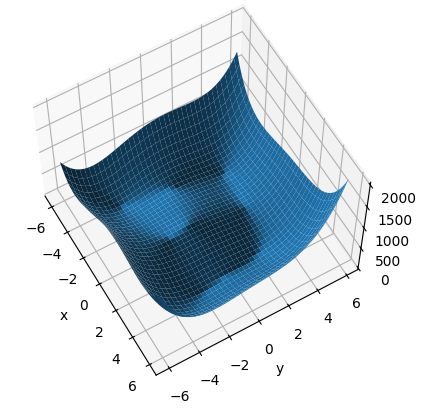

In [7]:
def fun(x):
    return (x[0] **2 + x[1] -11)**2 + (x[0] + x[1]**2 -7)**2

x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = fun([X,Y])

fig = plt.figure('fun')
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [ ]:
x = t.tensor([0.,0.],requires_grad=True)#初始化x,y为0,0
optimizer = t.optim.Adam([x],lr=0.001)#自动完成参数更新
for step in range(20000):
    pred = fun(x)
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()
    if step%2000==0:
        print(step,x.tolist(),pred.item())

0 [0.0009999999310821295, 0.0009999999310821295] 170.0
2000 [2.333181142807007, 1.9540694952011108] 13.730901718139648
4000 [2.9820079803466797, 2.0270984172821045] 0.014858869835734367
6000 [2.999983549118042, 2.0000221729278564] 1.1074007488787174e-08
8000 [2.9999938011169434, 2.0000083446502686] 1.5572823031106964e-09
10000 [2.999997854232788, 2.000002861022949] 1.8189894035458565e-10
12000 [2.9999992847442627, 2.0000009536743164] 1.6370904631912708e-11
14000 [2.999999761581421, 2.000000238418579] 1.8189894035458565e-12
16000 [3.0, 2.0] 0.0
18000 [3.0, 2.0] 0.0


### Logistic Regression

### cross entropy loss

In [1]:
import torch as t
import torch.nn.functional as F
x = t.randn(1,100)
w  = t.randn(10,100)

logits = x@w.t()
pred = F.softmax(logits,dim = 1)
pred_log = t.log(pred)

for i in range(10):
    print(F.cross_entropy(logits,t.tensor([i])))
#F.cross_entropy(logits,t.tensor([3]))


tensor(0.5207)
tensor(19.7964)
tensor(0.9065)
tensor(8.0849)
tensor(22.6317)
tensor(7.3361)
tensor(15.9978)
tensor(7.0377)
tensor(10.7241)
tensor(9.2693)
